In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

marketing = pd.read_csv('marketing.csv', parse_dates = ['date_served','date_subscribed','date_canceled'])

marketing['date_served'] = pd.to_datetime(marketing['date_served'])

marketing.describe()
marketing.info()
marketing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
user_id                10037 non-null object
date_served            10021 non-null datetime64[ns]
marketing_channel      10022 non-null object
variant                10037 non-null object
converted              10022 non-null object
language_displayed     10037 non-null object
language_preferred     10037 non-null object
age_group              10037 non-null object
date_subscribed        1856 non-null datetime64[ns]
date_canceled          577 non-null datetime64[ns]
subscribing_channel    1856 non-null object
is_retained            1856 non-null object
dtypes: datetime64[ns](3), object(9)
memory usage: 941.0+ KB


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [12]:
marketing['marketing_channel'].value_counts()

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

In [25]:
#channel_dict = {"House Ads":1, "Instagram":2, "Facebok":3, "Email":4, "Push":5}

#marketing['channel_code'] = marketing['marketing_channel'].map(channel_dict)

marketing['language_preferred'].value_counts()
#np.where(marketing['marketing_channel'] == 'House Ads', True, False)

English    9275
Spanish     450
German      167
Arabic      145
Name: language_preferred, dtype: int64

In [27]:
# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

In [26]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


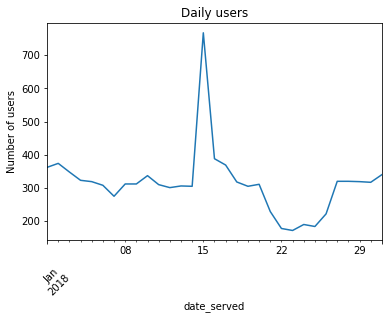

In [34]:
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()

In [40]:
#CTR
subscribed = marketing[marketing['converted'] == True]['user_id'].nunique()

total = marketing['user_id'].nunique()

conv_rate = subscribed/total

print(round(conv_rate*100,2),'%')

13.89 %


In [42]:
#Retencion Rate

retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()

subscribed = marketing[marketing['converted'] == True]['user_id'].nunique()

retention = retained/subscribed

print(round(retention*100,2),'%')

66.8 %


In [43]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of english speaking users
total = english_speakers['user_id'].nunique()

# Calculate the number of english speakers who converted
subscribers = english_speakers[english_speakers['converted'] == True]\
                            ['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:',  round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


In [45]:
# Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted'] == True].groupby(['language_displayed'])['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


In [46]:
#Agregando por fecha
#El equipo de marketing quiere saber si hay alguna diferencia en la tasa de conversión en función de cuándo, en el mes, sus usuarios vieron un anuncio.

# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


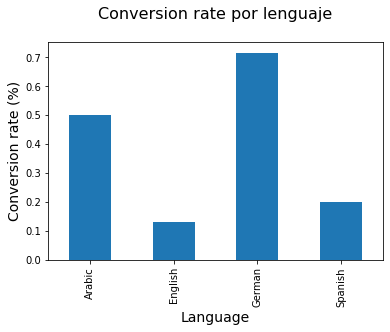

In [47]:
#Comparacion de conversiones lenguages

language_conversion_rate.plot(kind = 'bar')

plt.title('Conversion rate por lenguaje\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

plt.show()

In [60]:
#Creación de DataFrame de tasa de conversión diaria

# Group by date_served and count unique users
total = marketing.groupby(['date_subscribed'])['user_id'].nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True].groupby(['date_subscribed'])['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rate = subscribers/total

# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index(0))

# Rename columns
daily_conversion_rate.columns = ['date_subscribed', 
                                 'conversion_rate']

daily_conversion_rate

,date_subscribed,conversion_rate
0,2018-01-01,1.000000
1,2018-01-02,1.000000
2,2018-01-03,1.000000
3,2018-01-04,0.972222
4,2018-01-05,1.000000
5,2018-01-06,0.945946
6,2018-01-07,1.000000
7,2018-01-08,1.000000
8,2018-01-09,0.975000
9,2018-01-10,0.975610


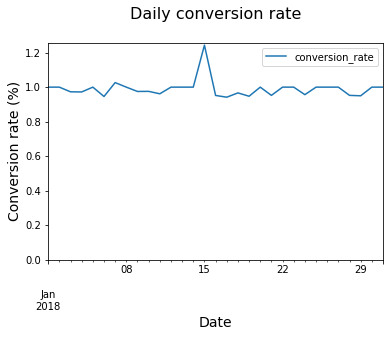

In [59]:
# Create a line chart using daily_conversion_rate DataFrame
daily_conversion_rate.plot('date_subscribed', 
                           'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()